In [1]:
import sys
sys.path.append('..')
from crawler.crawler import PttCrawlerMongoDB

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



db = PttCrawlerMongoDB(only_connect_db=True)
users = pd.DataFrame(columns=['id', 'len_ip', 'ip', 'len_article', 'article'])
for i, user in enumerate(db.find('user', { "$and": [{"$where": "this.ip.length < 5"}, {"$where": "this.ip.length > 0"}]} , ['id', 'ip', 'data'])):
# for i, user in enumerate(db.find('user',{} , ['id', 'ip', 'data'])):
    users.loc[i] = [user['id'], len(user['ip']), user['ip'], len(user['data']), user['data']]


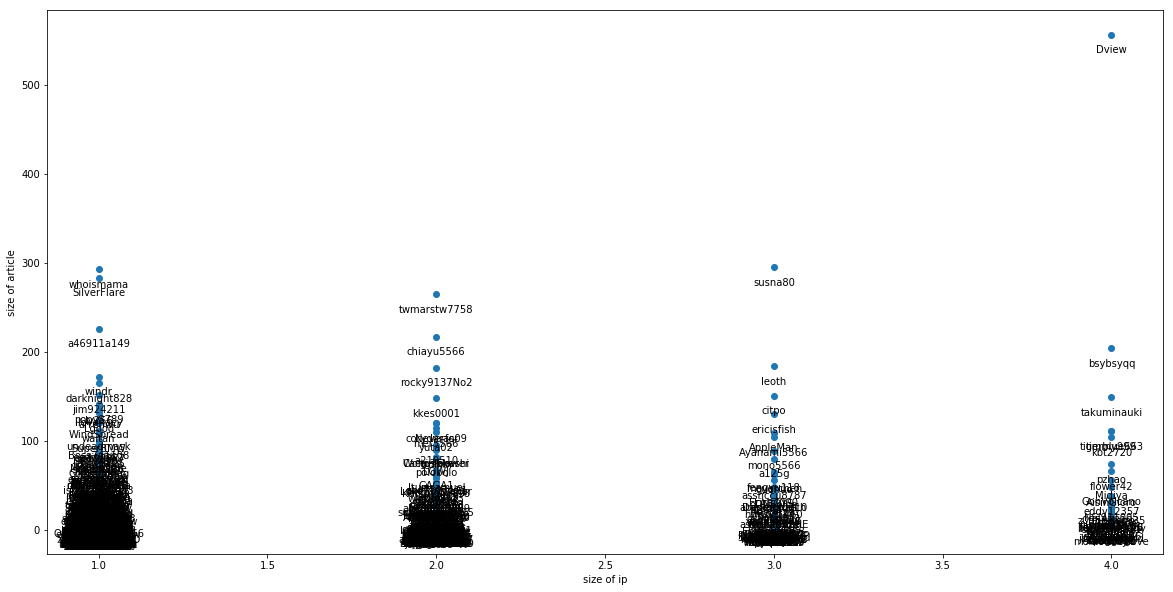

In [49]:
plt.rcParams['savefig.dpi'] =  1000
plt.figure(figsize=(20, 10))

x = users['len_ip'].astype(int)
y = users['len_article'].astype(int)

# plt.xlim((0, 20))
# plt.ylim((0, 200))
plt.xlabel('size of ip')
plt.ylabel('size of article')
plt.scatter(x, y)

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(  
        users['id'][i],
        xy=(xi, yi),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top')

In [29]:
arti30 = pd.DataFrame(columns=('id', 'WomenTalk', 'Baseball', 'Beauty', 'C_Chat', 'Gossiping'))
mask = users['len_article'] >= 30
for  i, (ids, arti) in enumerate(zip(users[mask]['id'], users[mask]['article'])):
    board_dic = dict()
    name = 0
    women = 0
    baseball = 0
    beauty = 0
    cchat = 0
    go = 0
    for a in arti:
        tmp = a['board']
        if tmp == 'WomenTalk':
            women += 1
        elif tmp == 'Baseball':
            baseball += 1
        elif tmp == 'Beauty':
            beauty += 1
        elif tmp == 'C_Chat':
            cchat += 1
        elif tmp == 'Gossiping':
            go += 1
    arti30.loc[i] = [ids, women, baseball, beauty, cchat, go]


In [30]:
arti30['total'] = arti30['WomenTalk'] + arti30['Baseball'] + arti30['C_Chat'] + arti30['Gossiping'] + arti30['Beauty']
arti30[['Baseball', 'WomenTalk', 'C_Chat', 'Gossiping', 'Beauty']].mean()

Baseball     15.115226
WomenTalk    22.065844
C_Chat       18.263374
Gossiping     7.016461
Beauty        5.810700
dtype: float64

In [31]:
std = [arti30.loc[i][['Baseball', 'WomenTalk', 'C_Chat', 'Gossiping', 'Beauty']].std() for i in range(len(arti30))]
mean = [arti30.loc[i][['Baseball', 'WomenTalk', 'C_Chat', 'Gossiping', 'Beauty']].mean() for i in range(len(arti30))]
arti30['std'] = std
arti30['mean'] = mean

In [40]:
arti30[['std', 'mean']]

,std,mean
0,47.970824,22.2
1,53.665631,24.0
2,15.817712,7.8
3,16.546903,7.4
4,28.065994,12.8
5,27.618834,12.6
6,31.643325,14.4
7,19.099738,10.4
8,101.070273,45.2
9,130.812843,59.0


[]

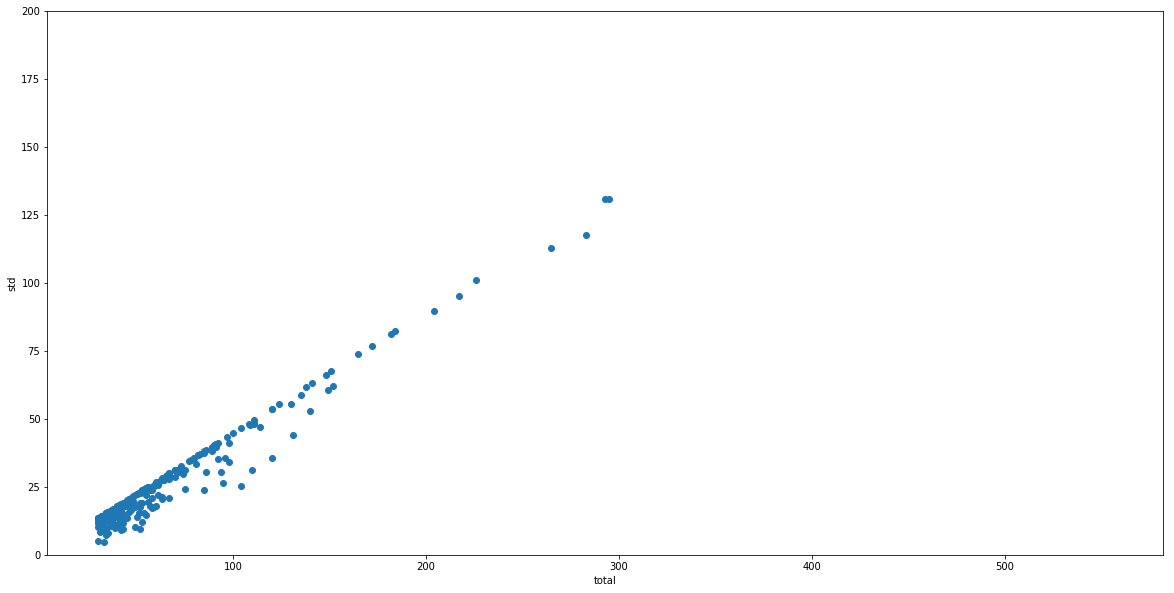

In [48]:
# plt.rcParams['savefig.dpi'] =  1000
plt.figure(figsize=(20, 10))

x = arti30['total']
y = arti30['std']

# plt.xlim((0, 20))
plt.ylim((0, 200))
plt.xlabel('total')
plt.ylabel('std')
plt.scatter(x, y)
plt.plot()

# for i, (xi, yi) in enumerate(zip(x, y)):
#     plt.annotate(  
#         arti30['id'][i],
#         xy=(xi, yi),
#         xytext=(0, -10),
#         textcoords='offset points',
#         ha='center',
#         va='top')